nn accuracy: 0.7467532467532467
nn precision: 0.6538461538461539
nn recall: 0.6181818181818182
nn f1: 0.6355140186915887
log accuracy: 0.7532467532467533
log precision: 0.6491228070175439
log recall: 0.6727272727272727
log f1: 0.6607142857142857
svm accuracy: 0.7272727272727273
svm precision: 0.6326530612244898
svm recall: 0.5636363636363636
svm f1: 0.5961538461538461


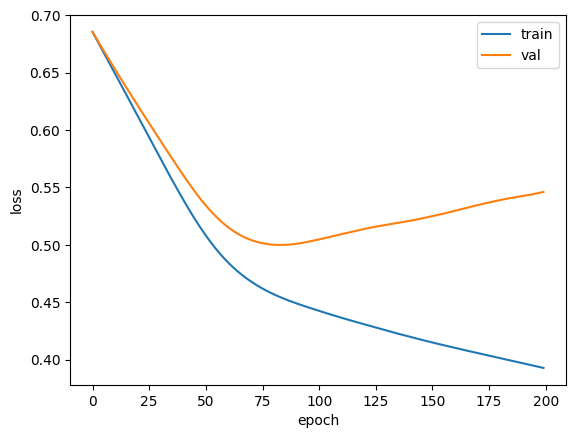

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import torch
import torch.nn as nn
import torch.optim as optim

# load data
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/diabetes.csv"
df = pd.read_csv(url)

# split x and y
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values

# scale
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# to tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

# net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(8, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.fc(x)

model = Net()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# train loop
epochs = 200
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    pred = model(X_train_t)
    loss = criterion(pred, y_train_t)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_pred = model(X_val_t)
        vloss = criterion(val_pred, y_val_t)

    train_losses.append(loss.item())
    val_losses.append(vloss.item())

# metrics for nn
with torch.no_grad():
    y_pred_nn = (model(X_val_t).numpy() > 0.5).astype(int)

acc_nn = accuracy_score(y_val, y_pred_nn)
pre_nn = precision_score(y_val, y_pred_nn)
rec_nn = recall_score(y_val, y_pred_nn)
f1_nn = f1_score(y_val, y_pred_nn)

print("nn accuracy:", acc_nn)
print("nn precision:", pre_nn)
print("nn recall:", rec_nn)
print("nn f1:", f1_nn)

# logistic regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_log = log_reg.predict(X_val)

print("log accuracy:", accuracy_score(y_val, y_log))
print("log precision:", precision_score(y_val, y_log))
print("log recall:", recall_score(y_val, y_log))
print("log f1:", f1_score(y_val, y_log))

# svm
svm = SVC()
svm.fit(X_train, y_train)
y_svm = svm.predict(X_val)

print("svm accuracy:", accuracy_score(y_val, y_svm))
print("svm precision:", precision_score(y_val, y_svm))
print("svm recall:", recall_score(y_val, y_svm))
print("svm f1:", f1_score(y_val, y_svm))

# plot losses
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()


# **PROBLEM2**

nn accuracy: 0.9736842105263158
nn precision: 0.9722222222222222
nn recall: 0.9859154929577465
nn f1: 0.9790209790209791
log accuracy: 0.9736842105263158
log precision: 0.9722222222222222
log recall: 0.9859154929577465
log f1: 0.9790209790209791
svm accuracy: 0.9736842105263158
svm precision: 0.9722222222222222
svm recall: 0.9859154929577465
svm f1: 0.9790209790209791


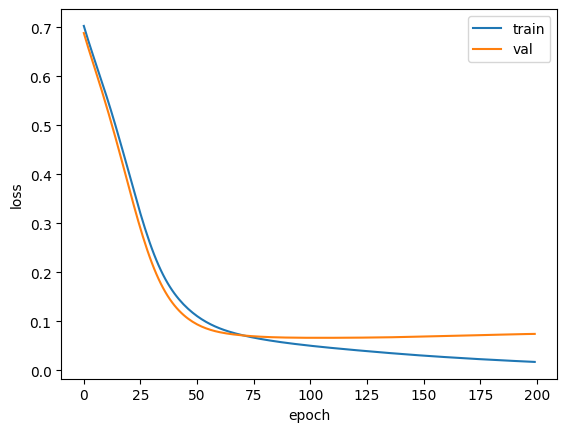

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import torch
import torch.nn as nn
import torch.optim as optim

# load data
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# scale
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# to tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

# net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(30, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.fc(x)

model = Net()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# train loop
epochs = 200
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    pred = model(X_train_t)
    loss = criterion(pred, y_train_t)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_pred = model(X_val_t)
        vloss = criterion(val_pred, y_val_t)

    train_losses.append(loss.item())
    val_losses.append(vloss.item())

# nn metrics
with torch.no_grad():
    y_pred_nn = (model(X_val_t).numpy() > 0.5).astype(int)

acc_nn = accuracy_score(y_val, y_pred_nn)
pre_nn = precision_score(y_val, y_pred_nn)
rec_nn = recall_score(y_val, y_pred_nn)
f1_nn = f1_score(y_val, y_pred_nn)

print("nn accuracy:", acc_nn)
print("nn precision:", pre_nn)
print("nn recall:", rec_nn)
print("nn f1:", f1_nn)

# logistic regression
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)
y_log = log_reg.predict(X_val)

print("log accuracy:", accuracy_score(y_val, y_log))
print("log precision:", precision_score(y_val, y_log))
print("log recall:", recall_score(y_val, y_log))
print("log f1:", f1_score(y_val, y_log))

# svm
svm = SVC()
svm.fit(X_train, y_train)
y_svm = svm.predict(X_val)

print("svm accuracy:", accuracy_score(y_val, y_svm))
print("svm precision:", precision_score(y_val, y_svm))
print("svm recall:", recall_score(y_val, y_svm))
print("svm f1:", f1_score(y_val, y_svm))

# plot
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()


# **PROBLEM3**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time

# load data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testloader  = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# net for part a
class NetA(nn.Module):
    def __init__(self):
        super(NetA,self).__init__()
        self.fc1 = nn.Linear(3*32*32, 512)
        self.fc2 = nn.Linear(512, 10)
        self.relu = nn.ReLU()
    def forward(self,x):
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelA = NetA().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelA.parameters(), lr=0.001)

epochs = 20
for epoch in range(epochs):
    start = time.time()
    modelA.train()
    running = 0

    for imgs,labels in trainloader:
        imgs,labels = imgs.to(device), labels.to(device)
        out = modelA(imgs)
        loss = criterion(out, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running += loss.item()

    # eval
    modelA.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for imgs,labels in testloader:
            imgs,labels = imgs.to(device), labels.to(device)
            out = modelA(imgs)
            _,pred = torch.max(out,1)
            total += labels.size(0)
            correct += (pred==labels).sum().item()

    acc = correct / total
    print("epoch", epoch+1,
          "train_loss", running/len(trainloader),
          "test_acc", acc,
          "time", time.time()-start)


100%|██████████| 170M/170M [00:13<00:00, 12.5MB/s]


epoch 1 train_loss 1.6433358716842767 test_acc 0.4489 time 14.088281154632568
epoch 2 train_loss 1.4482658086225504 test_acc 0.4972 time 13.522689580917358
epoch 3 train_loss 1.348244931996631 test_acc 0.5137 time 13.969053983688354
epoch 4 train_loss 1.2743373164130598 test_acc 0.5144 time 13.615269660949707
epoch 5 train_loss 1.2121665175918424 test_acc 0.5185 time 13.336580991744995
epoch 6 train_loss 1.1459167576811808 test_acc 0.5174 time 14.738996267318726
epoch 7 train_loss 1.0871097541526151 test_acc 0.5145 time 13.320123434066772
epoch 8 train_loss 1.031105123974783 test_acc 0.518 time 13.444091558456421
epoch 9 train_loss 0.9800300569180638 test_acc 0.5245 time 13.608551502227783
epoch 10 train_loss 0.9321539004135619 test_acc 0.5239 time 13.728723526000977
epoch 11 train_loss 0.8637938254019794 test_acc 0.5147 time 13.841865062713623
epoch 12 train_loss 0.825769110866215 test_acc 0.5091 time 13.342585563659668
epoch 13 train_loss 0.7861545921286659 test_acc 0.5246 time 13.45

# **PARTB**

In [2]:
# net for part b
class NetB(nn.Module):
    def __init__(self):
        super(NetB,self).__init__()
        self.fc1 = nn.Linear(3*32*32, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
    def forward(self,x):
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

modelB = NetB().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelB.parameters(), lr=0.001)

epochs = 300
for epoch in range(epochs):
    start = time.time()
    modelB.train()
    running = 0

    for imgs,labels in trainloader:
        imgs,labels = imgs.to(device), labels.to(device)
        out = modelB(imgs)
        loss = criterion(out, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running += loss.item()

    # eval
    if (epoch+1) % 10 == 0:
        modelB.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs,labels in testloader:
                imgs,labels = imgs.to(device), labels.to(device)
                out = modelB(imgs)
                _,pred = torch.max(out,1)
                total += labels.size(0)
                correct += (pred==labels).sum().item()

        acc = correct / total
        print("epoch", epoch+1,
              "train_loss", running/len(trainloader),
              "test_acc", acc,
              "time", time.time()-start)


epoch 10 train_loss 0.7428363398517794 test_acc 0.5489 time 13.35331678390503
epoch 20 train_loss 0.30214335073900345 test_acc 0.5347 time 13.213318586349487
epoch 30 train_loss 0.20802048992013078 test_acc 0.5247 time 13.746971607208252
epoch 40 train_loss 0.15138385064252044 test_acc 0.532 time 13.640225172042847
epoch 50 train_loss 0.12153914369776121 test_acc 0.5311 time 13.548651695251465
epoch 60 train_loss 0.11550782052109308 test_acc 0.5348 time 13.862188816070557
epoch 70 train_loss 0.08251857267849891 test_acc 0.5263 time 13.273170709609985
epoch 80 train_loss 0.08182973275080209 test_acc 0.5235 time 13.738338947296143
epoch 90 train_loss 0.08338617593350123 test_acc 0.5318 time 13.228106498718262
epoch 100 train_loss 0.0808741573840999 test_acc 0.5322 time 13.604655265808105
epoch 110 train_loss 0.09069866138508025 test_acc 0.5292 time 13.538885831832886
epoch 120 train_loss 0.07189594102544648 test_acc 0.5204 time 13.553045988082886
epoch 130 train_loss 0.06789976984585214 